**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
Clase 9 - Práctica de derivadas y variaciones

In [37]:
#librerias de la clase
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

### Ejercicio 1: Derivada simbólica y evaluación
Dada la función $h(x) = \frac{e^{x^2}}{\sqrt{x}} + \cos(x) \cdot \ln(x)$, utiliza `SymPy` para:
1.  Definir la función $h(x)$ simbólicamente.
2.  Calcular la primera derivada de $h(x)$ con respecto a $x$.
3.  Simplificar la expresión de la derivada si es posible.
4.  Evaluar la derivada en un punto arbitrario (por ejemplo, $x = 2$) utilizando `.subs()` y `.evalf()`.

In [38]:
# Paso 1: Definición simbólica de h(x)
# Dominio h(x): x > 0 (para garantizar dominio de sqrt(x) y ln(x))
x = sp.Symbol('x', positive=True)

h = sp.exp(x**2)/sp.sqrt(x) + sp.cos(x)*sp.log(x)

print('h(x) =')
h

h(x) =


log(x)*cos(x) + exp(x**2)/sqrt(x)

In [39]:
# Paso 2: Cálculo de la primera derivada h'(x)
# Utilizamos la función diff de SymPy para derivar término a término
h_prime = sp.diff(h, x)

print("h'(x) =")
sp.pprint(h_prime)

h'(x) =
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   


In [40]:
# Paso 3: Simplificación de la derivada h'(x)
# Partimos de h_prime calculada previamente
h_prime_simpl = sp.simplify(h_prime)

print("Derivada original:")
sp.pprint(h_prime)
print("\nDerivada simplificada (simplify):")
sp.pprint(h_prime_simpl)

# Intentamos factorización adicional si aporta legibilidad
h_prime_factor = sp.factor(h_prime_simpl)
print("\nDerivada factorizada (factor):")
sp.pprint(h_prime_factor)

Derivada original:
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   

Derivada simplificada (simplify):
                                       ⎛ 2⎞ 
      ⎛ 2⎞                             ⎝x ⎠ 
      ⎝x ⎠                   cos(x)   ℯ     
2⋅√x⋅ℯ     - log(x)⋅sin(x) + ────── - ──────
                               x         3/2
                                      2⋅x   

Derivada factorizada (factor):
                                               ⎛ 2⎞      ⎛ 2⎞
     5/2                    3/2             3  ⎝x ⎠      ⎝x ⎠
- 2⋅x   ⋅log(x)⋅sin(x) + 2⋅x   ⋅cos(x) + 4⋅x ⋅ℯ     - x⋅ℯ    
─────────────────────────────────────────────────────────────
                              5/2                            
                           2⋅x                               


In [41]:
# Paso 4: Evaluación de la derivada en x = 2
# Utilizamos .subs() para sustituir y .evalf() para obtener valor numérico

# Evaluamos usando la derivada simplificada
punto_evaluacion = 2
h_prime_en_2 = h_prime_simpl.subs(x, punto_evaluacion)

print(f"h'({punto_evaluacion}) sustituyendo directamente:")
sp.pprint(h_prime_en_2)

# Evaluamos numéricamente con .evalf()
h_prime_en_2_numerico = h_prime_en_2.evalf()
print(f"\nh'({punto_evaluacion}) evaluado numéricamente:")
print(f"h'({punto_evaluacion}) ≈ {h_prime_en_2_numerico}")

# También evaluamos la función original en el mismo punto para contexto
h_en_2 = h.subs(x, punto_evaluacion).evalf()
print(f"\nPara referencia, h({punto_evaluacion}) ≈ {h_en_2}")

h'(2) sustituyendo directamente:
                                 4
                 cos(2)   15⋅√2⋅ℯ 
-log(2)⋅sin(2) + ────── + ────────
                   2         8    

h'(2) evaluado numéricamente:
h'(2) ≈ 143.936857616570

Para referencia, h(2) ≈ 38.3182711222252


Función original: h(2.0) ≈ 38.3
Primera derivada: h'(2.0) ≈ 143.9
Interpretación: En x=2.0, la función está creciendo a una tasa de 143.9 unidades por unidad de x


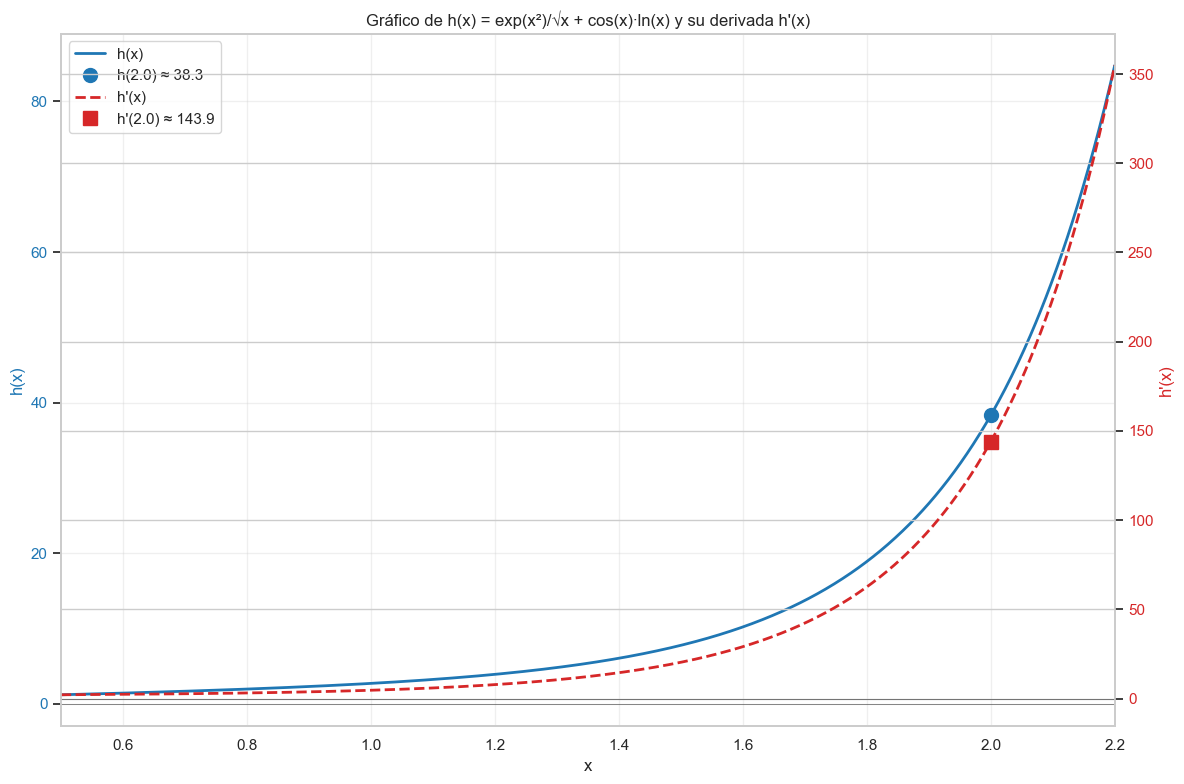

In [42]:
# Paso adicional: Gráfico de la función h(x) y su derivada h'(x)
# Convertimos las funciones simbólicas a numéricas para graficar

# Creamos funciones numéricas usando lambdify
h_numerica = sp.lambdify(x, h, 'numpy')
h_prime_numerica = sp.lambdify(x, h_prime_simpl, 'numpy')

# Rango de valores limitado para mejor visualización del punto x=2
x_vals = np.linspace(0.5, 2.2, 1000)
y_vals = h_numerica(x_vals)
y_prime_vals = h_prime_numerica(x_vals)

# Creamos el gráfico con dos ejes Y para diferentes escalas
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje principal para h(x)
color1 = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('h(x)', color=color1)
line1 = ax1.plot(x_vals, y_vals, color=color1, linewidth=2, label='h(x)')
ax1.tick_params(axis='y', labelcolor=color1)

# Marcamos el punto donde evaluamos la función
punto_x = float(punto_evaluacion)
punto_y = float(h_en_2)
ax1.plot(punto_x, punto_y, 'o', color=color1, markersize=10, 
         label=f'h({punto_x}) ≈ {punto_y:.1f}')

# Eje secundario para h'(x)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("h'(x)", color=color2)
line2 = ax2.plot(x_vals, y_prime_vals, color=color2, linewidth=2, 
                 linestyle='--', label="h'(x)")
ax2.tick_params(axis='y', labelcolor=color2)

# Marcamos el punto donde evaluamos la derivada
punto_y_prime = float(h_prime_en_2_numerico)
ax2.plot(punto_x, punto_y_prime, 's', color=color2, markersize=10,
         label=f"h'({punto_x}) ≈ {punto_y_prime:.1f}")

# Configuración del gráfico
ax1.set_title('Gráfico de h(x) = exp(x²)/√x + cos(x)·ln(x) y su derivada h\'(x)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 2.2)

# Líneas de referencia
ax1.axhline(y=0, color='k', linewidth=0.5, alpha=0.7)
ax2.axhline(y=0, color='k', linewidth=0.5, alpha=0.7)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

print(f"Función original: h({punto_x}) ≈ {punto_y:.1f}")
print(f"Primera derivada: h'({punto_x}) ≈ {punto_y_prime:.1f}")
print(f"Interpretación: En x={punto_x}, la función está creciendo a una tasa de {punto_y_prime:.1f} unidades por unidad de x")

plt.tight_layout()
plt.show()